In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
states = ["AL", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {'the United States':'US','Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC', 'Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI', 'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO', 'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC', 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR', 'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT', 'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [5]:
out = pd.DataFrame(columns=['State']+[str(i) for i in range(2010,2019)])
for sa in states:
    df = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+'/Buildings Infrastructure/State-Level/'+abbrev_us_state[sa]+' All ACS Buildings Data.csv',index_col=0)
    df = df[df.Metric=='Total Housing Units']
    houses = list(df.iloc[0,2:-1])
    df2 = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+'/CO2 Emissions/'+sa+' EIA CO2 Emissions Data.csv',index_col=0)
    df2 = df2.filter([str(i) for i in range(2010,2019)])
    co2 = list(df2.iloc[3,:])
    co2_int = [(co2[i]*1000000)/houses[i] for i in range(len(houses))]
    out.loc[len(out.index)] = [sa]+co2_int

In [28]:
df = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+'/Buildings Infrastructure/State-Level/'+abbrev_us_state[sa]+' All ACS Buildings Data.csv',index_col=0)
df.index = df.Metric
df.head(100)

,Metric,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Metric,,,,,,,,,,,,
Avg household size of owner-occupied unit,Avg household size of owner-occupied unit,CA,2.99,3.00,3.00,3.00,3.01,3.01,3.01,3.03,3.03,3.02
Avg household size of renter-occupied unit,Avg household size of renter-occupied unit,CA,2.89,2.91,2.93,2.93,2.94,2.93,2.92,2.91,2.88,2.85
House Heating Fuel: Electric,House Heating Fuel: Electric,CA,3042396.00,3180216.00,3298902.00,3379399.00,3323498.00,3427206.00,3461462.00,3452150.00,3496270.00,3497610.00
House Heating Fuel: Fuel Oil,House Heating Fuel: Fuel Oil,CA,35932.00,35746.00,34136.00,33220.00,30061.00,30962.00,29687.00,32051.00,33503.00,30373.00
House Heating Fuel: Gas,House Heating Fuel: Gas,CA,8289619.00,8259792.00,8230125.00,8149303.00,8249834.00,8252070.00,8286377.00,8370720.00,8342368.00,8469893.00
House Heating Fuel: Propane,House Heating Fuel: Propane,CA,393137.00,381065.00,376616.00,414887.00,406961.00,399275.00,411060.00,420817.00,426163.00,426530.00
House Heating Fuel: Wood,House Heating Fuel: Wood,CA,218319.00,216924.00,215614.00,204825.00,221127.00,218185.00,201493.00,197217.00,182905.00,181624.00
Median Number of Rooms,Median Number of Rooms,CA,5.10,5.10,5.00,5.10,5.00,5.10,5.00,5.00,5.00,5.00
Number of Rooms: 1,Number of Rooms: 1,CA,461928.00,439275.00,424719.00,426830.00,434383.00,539055.00,548104.00,574166.00,577749.00,576699.00


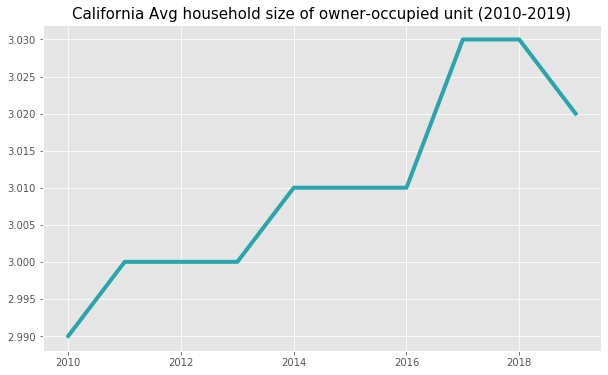

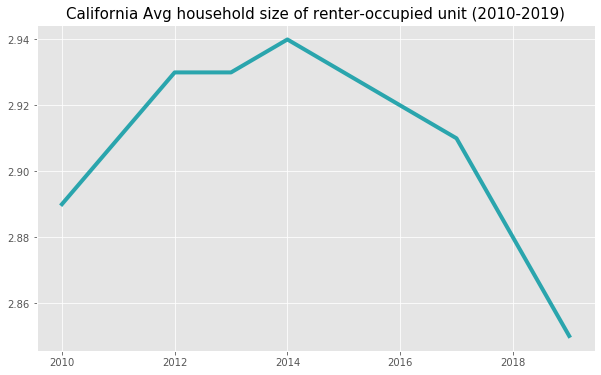

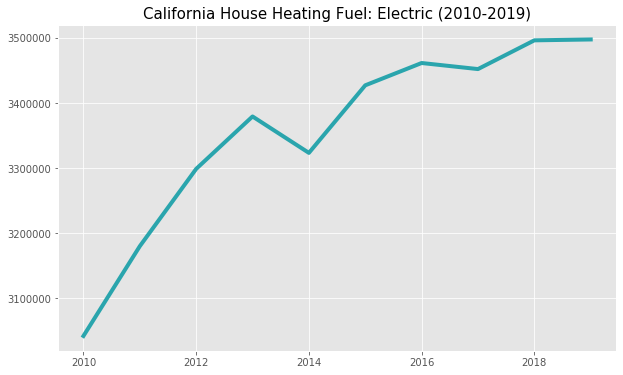

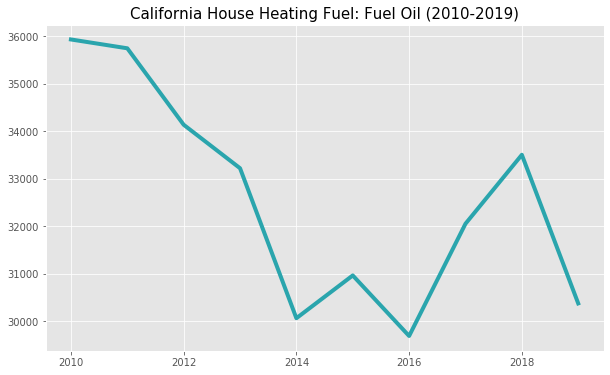

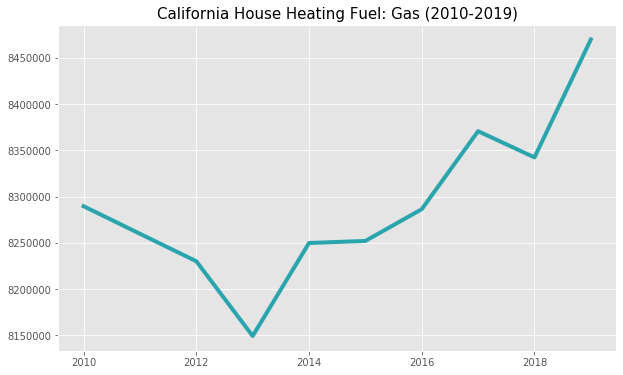

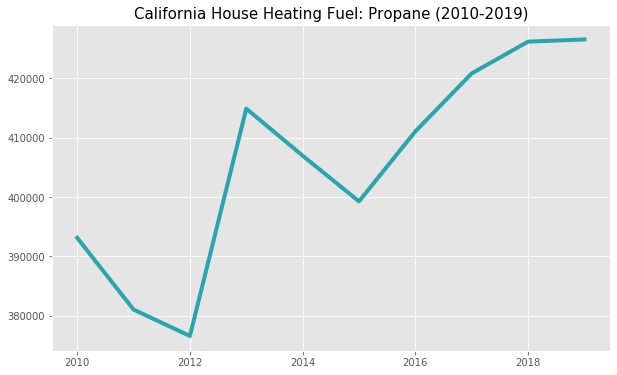

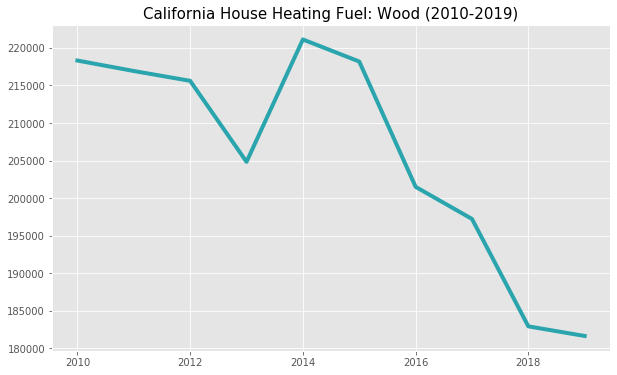

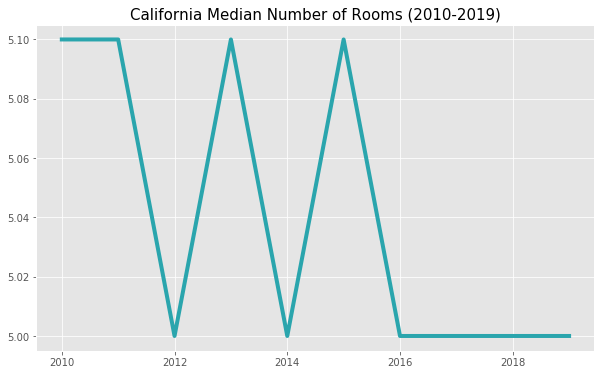

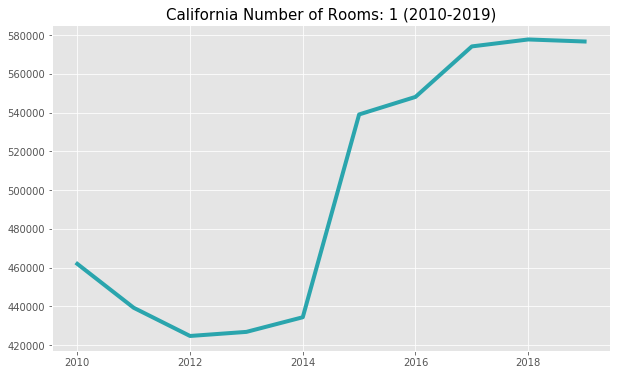

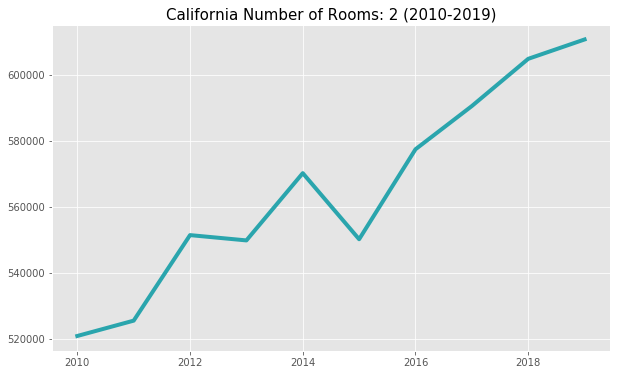

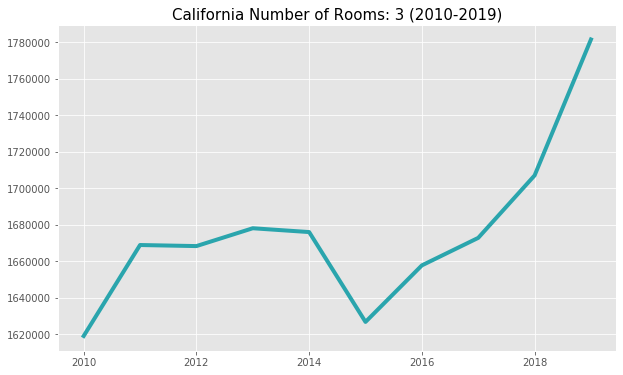

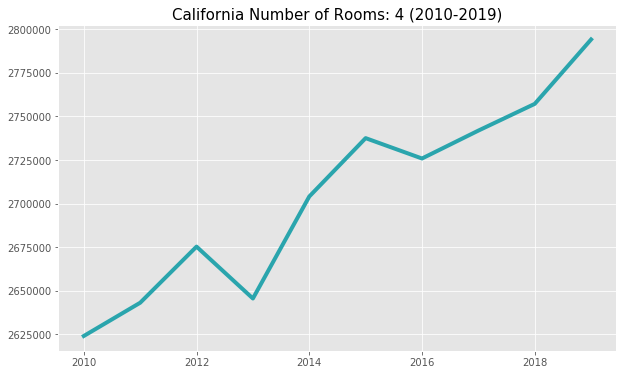

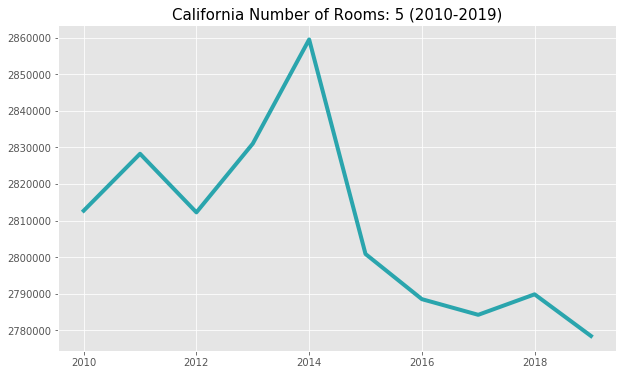

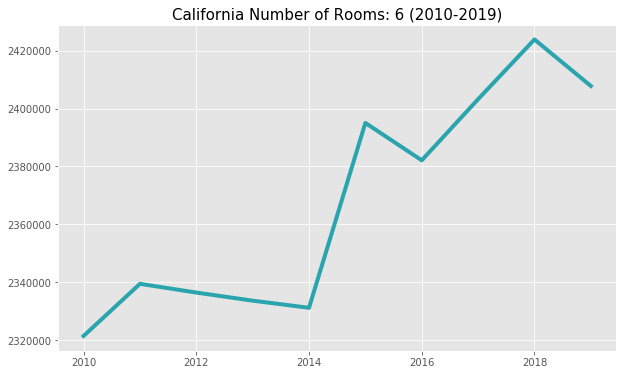

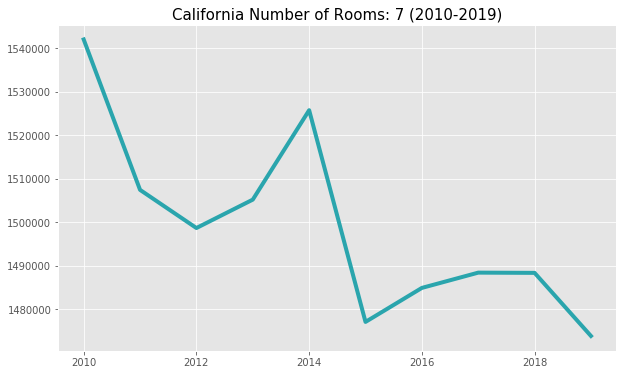

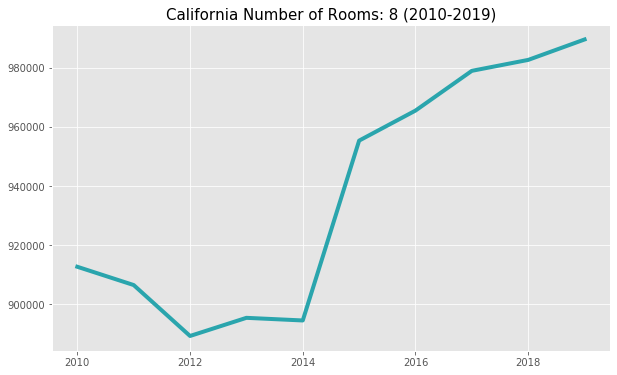

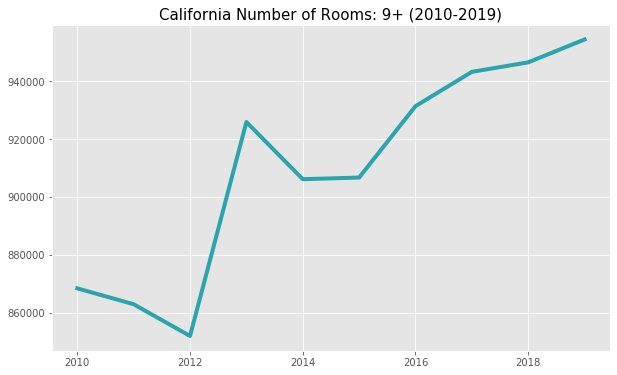

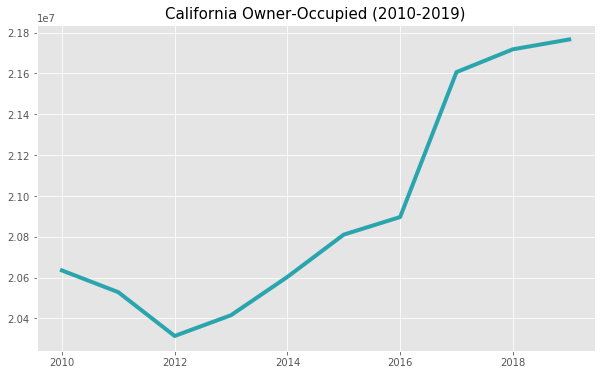

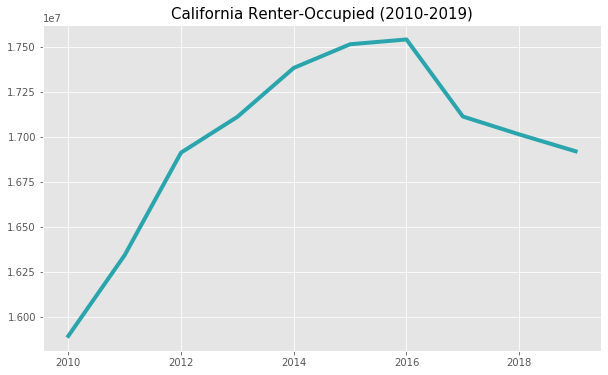

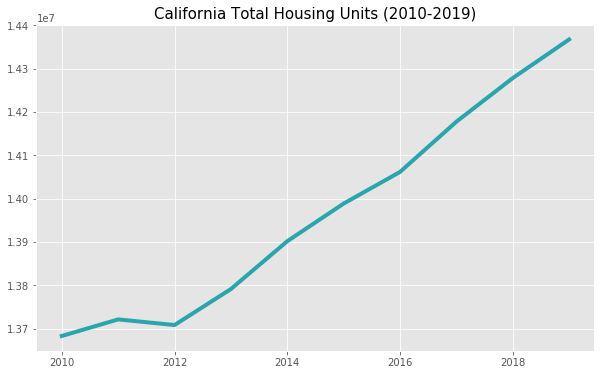

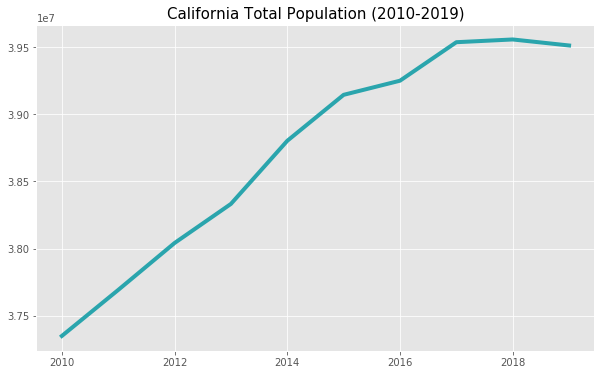

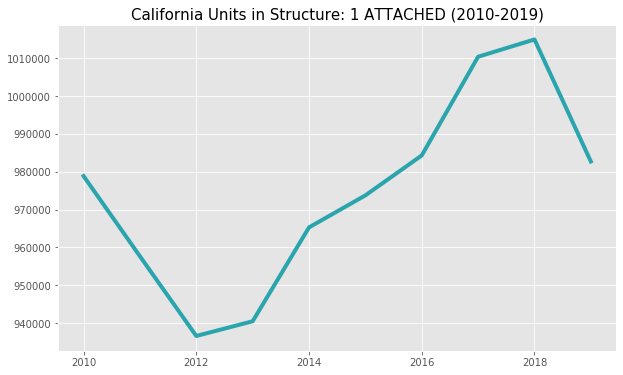

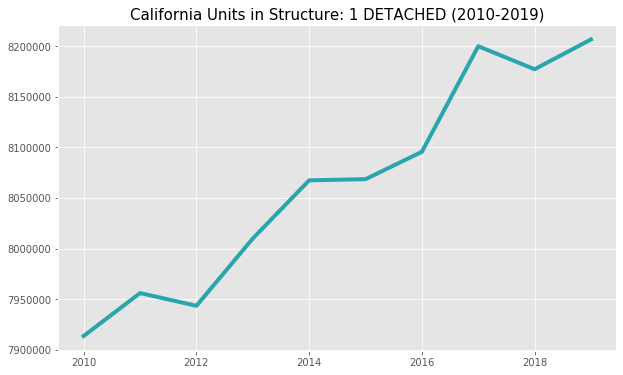

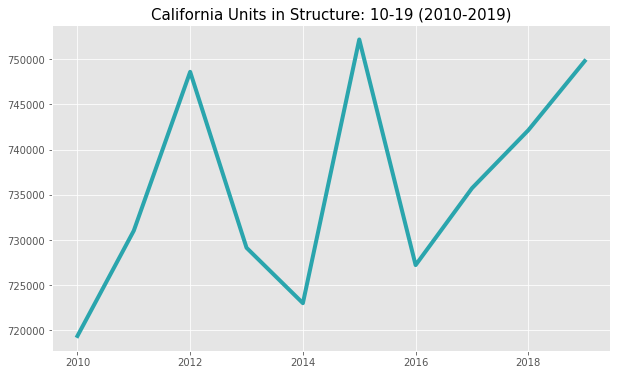

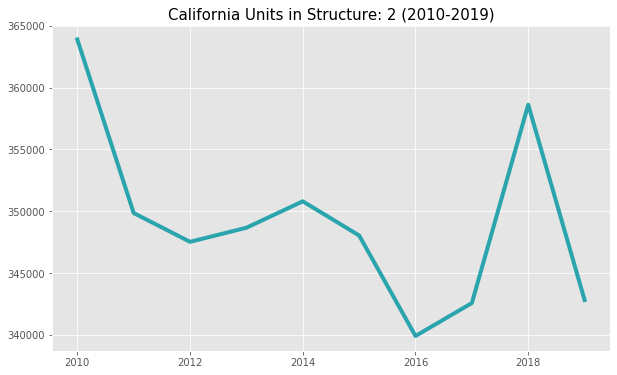

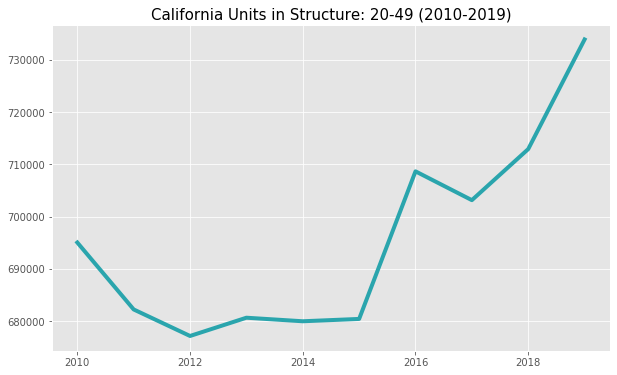

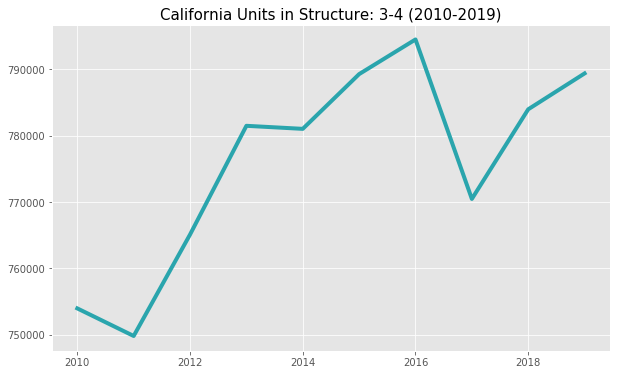

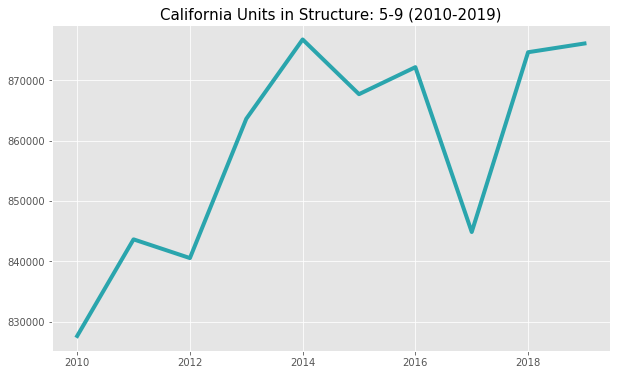

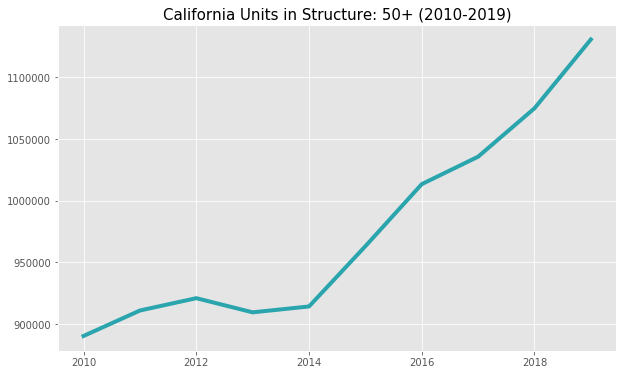

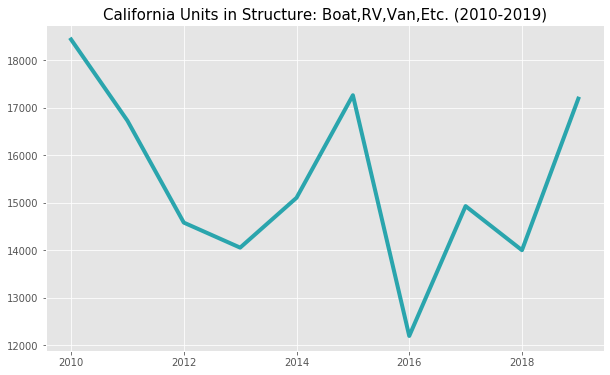

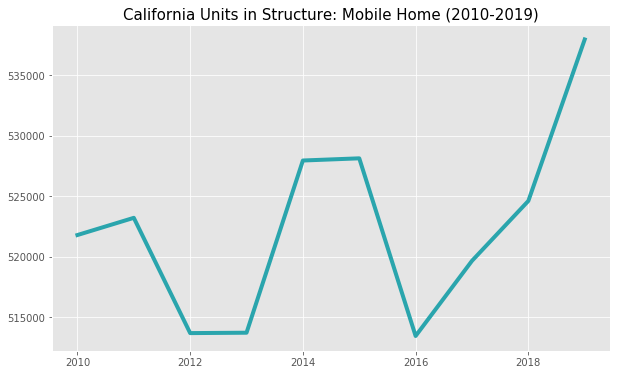

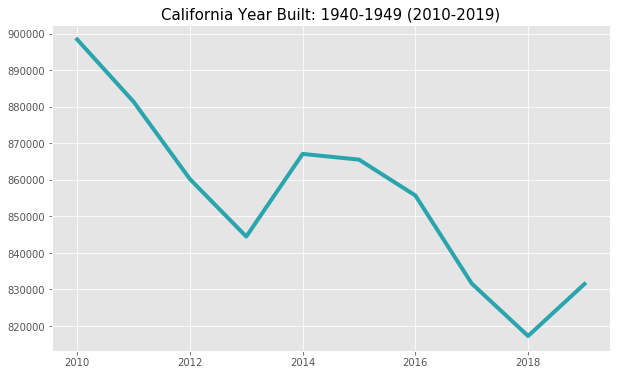

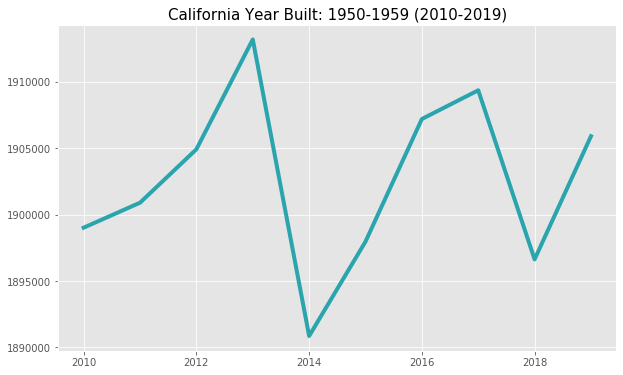

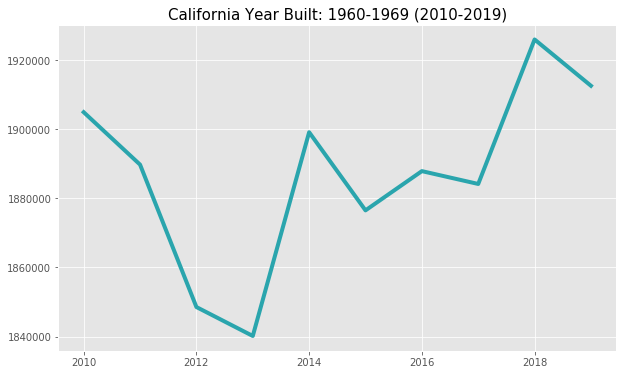

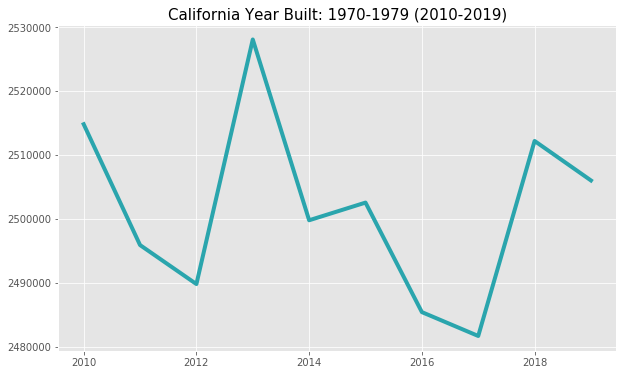

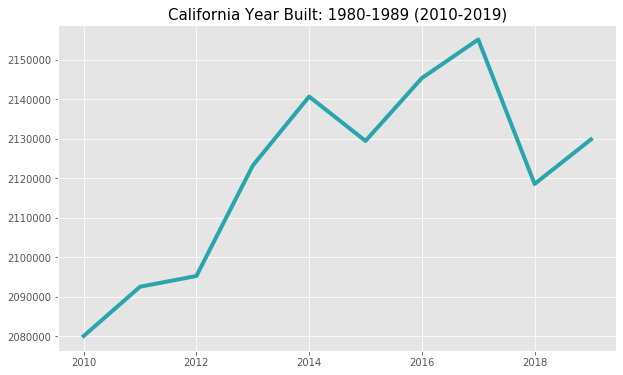

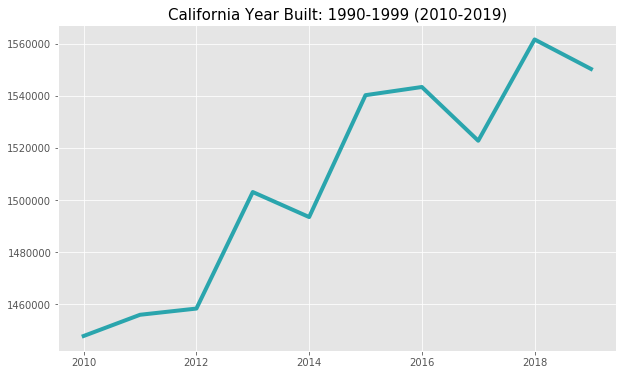

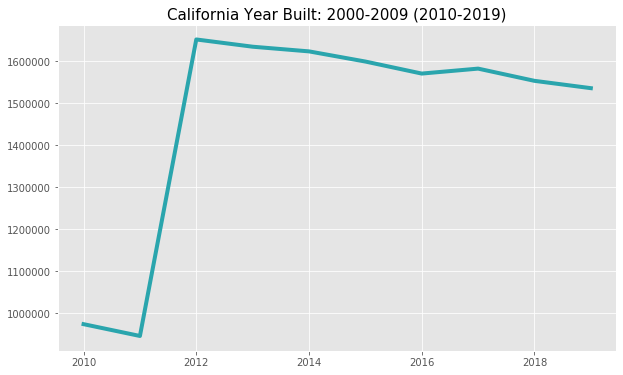

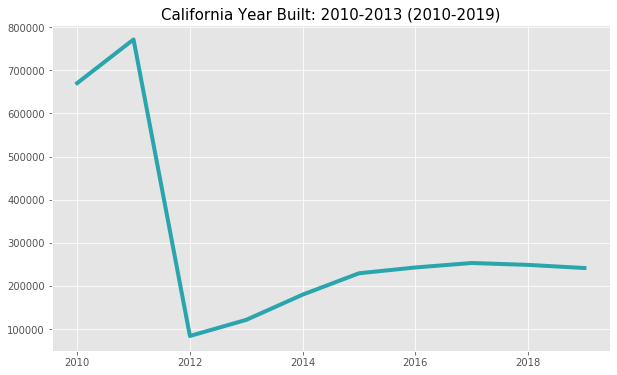

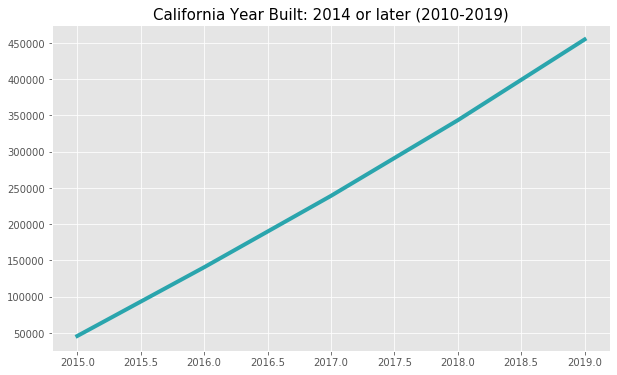

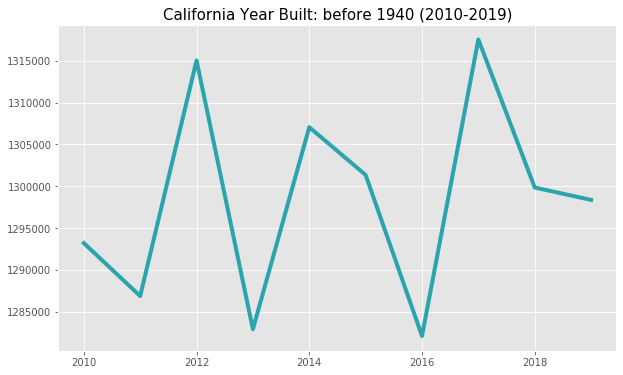

In [27]:
sa='CA'
df = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+'/Buildings Infrastructure/State-Level/'+abbrev_us_state[sa]+' All ACS Buildings Data.csv',index_col=0)
df.index = df.Metric
df.head()

for m in df.Metric.unique():
    plt.figure(figsize=(10,6))
    plt.title(abbrev_us_state[sa] + ' ' + m + ' (2010-2019)', fontsize=15)
    y = list(df.loc[m][2:])
    plt.plot(range(2010,2020),y, linewidth=4, color='#2aa5ad')
    plt.show()
    plt.close()

In [6]:
for sa in states:
    df = pd.read_csv('../State Factbase/Spreadsheets/State-Level Data/'+abbrev_us_state[sa]+'/Buildings Infrastructure/State-Level/'+abbrev_us_state[sa]+' All ACS Buildings Data.csv',index_col=0)
    

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,1.314957,1.074354,0.801790,0.999124,1.099738,0.960139,0.836739,5.480743,0.990610
1,AZ,0.816563,0.838787,0.727187,0.832362,0.696919,0.727317,0.739354,0.688599,0.739830
2,AR,1.759252,1.611148,1.236110,1.661751,1.756743,1.513736,1.226079,1.145653,1.544273
3,CA,2.113294,2.161741,1.993163,2.008596,1.648228,1.674818,1.714717,1.770207,1.736284
4,CO,3.547184,3.534742,3.167888,3.659638,3.549857,3.266051,3.220628,3.068021,3.313046


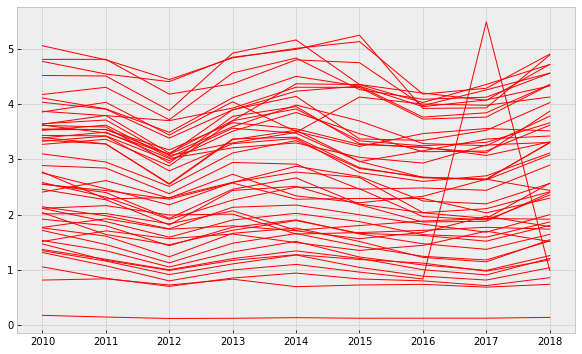

In [98]:
plt.figure(figsize=(10,6))
for i in out.index:
    plt.plot(range(2010,2019),out.iloc[i,1:], color='red',linewidth=1)

In [8]:
df.head(50)

,Metric,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Avg household size of owner-occupied unit,NY,2.76,2.76,2.76,2.78,2.77,2.8,2.8,2.78,2.73,2.71
1,Avg household size of renter-occupied unit,NY,2.44,2.47,2.47,2.48,2.47,2.5,2.5,2.47,2.39,2.34
2,House Heating Fuel: Electric,NY,676262.00,707016.00,775390.00,764400.00,770577.00,808370.0,860856.0,867925.00,890554.00,911445.00
3,House Heating Fuel: Fuel Oil,NY,2068004.00,1979067.00,1901118.00,1802442.00,1752656.00,1649860.0,1540787.0,1496843.00,1459976.00,1393560.00
4,House Heating Fuel: Gas,NY,3961085.00,4014222.00,4044389.00,4074510.00,4186666.00,4202413.0,4227422.0,4339349.00,4397917.00,4519999.00
5,House Heating Fuel: Propane,NY,227607.00,222634.00,237738.00,259367.00,258775.00,265224.0,273838.0,294973.00,308020.00,319576.00
6,House Heating Fuel: Wood,NY,143242.00,143287.00,155603.00,148422.00,145012.00,141016.0,126890.0,122088.00,120159.00,114011.00
25,Median Number of Rooms,NY,5.00,5.00,5.00,5.00,5.00,5.0,5.0,5.00,5.00,5.00
26,Number of Rooms: 1,NY,290865.00,305994.00,310581.00,313312.00,312257.00,371998.0,358834.0,341160.00,360713.00,353543.00
27,Number of Rooms: 2,NY,288943.00,300541.00,289960.00,312844.00,299736.00,293864.0,300858.0,314983.00,346185.00,365068.00


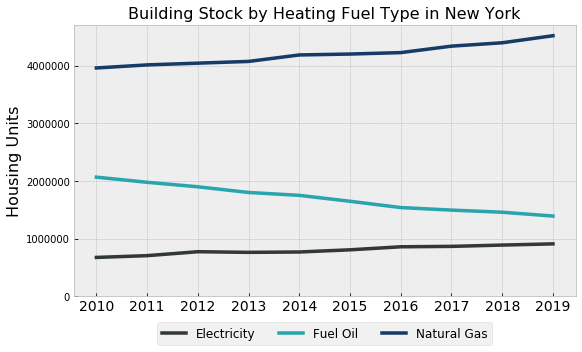

In [30]:
x = range(2010,2020)
plt.figure(figsize = (9,5))
#mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('bmh')
plt.title('Building Stock by Heating Fuel Type in New York', fontsize=16)
plt.plot(x, df.iloc[2,2:], linewidth='3.5',color='#323838', label='Electricity')
plt.plot(x, df.iloc[3,2:], linewidth='3.5',color='#2aa5ad', label='Fuel Oil')
plt.plot(x, df.iloc[4,2:], linewidth='3.5',color='#153b66', label='Natural Gas')
#plt.plot(x, dfco2.iloc[:,1], linewidth='3.5', color='#2aa5ad',label='Natural Gas')
#plt.plot(x, dfco2.iloc[:,2], linewidth='3.5', color='#153b66', label='Petroleum and other liquids')
#plt.ylim(0,val_max*1.1)
plt.ylim(0,)
#plt.yticks(np.arange(0,2501, step=500), fontsize=15)
plt.xticks((np.arange(2010, 2020, step=1)), fontsize=14)
plt.ylabel('Housing Units', fontsize=16)
plt.legend(fontsize=12, ncol=3, bbox_to_anchor=(0.5, -0.2), loc='lower center')
plt.show()

In [ ]:
x = range(2010,2020)
y = df.iloc[2,2:]
plt.plot(x,y)